In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import animation, rc
from IPython.display import HTML

# Simulating a Brownian Particle

C:\Users\dpcar\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


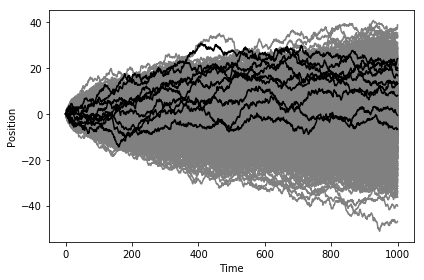

In [15]:
D = 1
delt = 0.1 


def trajectory(x, initalx = 0): 
    tra = np.array([initalx])
    for i in range(len(x)):
        tra = np.append(tra, tra[i]+x[i])
    return tra
N = 10**3
M = 1000

xrand = np.sqrt(2*D*delt)*np.random.randn(N)
traj = trajectory(xrand)
for i in range(M):
    xrand = np.sqrt(2*D*delt)*np.random.randn(N)
    traj2 = trajectory(xrand)

    traj = np.column_stack((traj, traj2))

plt.figure()

plt.plot(range(len(traj)),traj, '#808080')
plt.plot(range(len(traj)), traj[:, 0:9],'k')

plt.xlabel('Time')
plt.ylabel('Position')

plt.show()

# Histogram of particles at a particular time
# plt.figure()
# plt.
# plt.hist(traj[10, :], bins=70, density=True)
# plt.xlim(-75,75)
# plt.show()

# Animating the distributions of particles

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import clear_output
rcParams.update({'figure.autolayout': True})
fig = plt.figure(figsize=(12,7))

ay = fig.add_subplot(111, autoscale_on=False, xlim = (-75,75), ylim = (0,0.7))
#plt.tight_layout()



def init():
    """initialize animation"""
    return
frames = 200
def animate(i):
    """perform animation step"""
    global fig
    t=i
    # update pieces of the animation
    r = np.linspace(-75, 75, 1000)
    prob =  (4*np.pi * D* (t*delt+delt))**(-1/2)  *np.exp(-r**2/(4*D*(t*delt+delt)))
    
    if i % 1 == 0: # How often I want to animate frames
        clear_output(wait=True)
        print((i/frames)*100, '%')
        ay.clear()
        hist = ay.hist(traj[i, :],bins='auto',density=True,label='Measured')
        theo, = ay.plot(r,prob, label = 'Theoretical Prediction')

        ay.set_title('Probability Distribution of Position')
        ay.set_xlabel('Position', fontsize=18)
        ay.set_ylabel('probability', fontsize=18)
        ay.legend()
        ay.set_xlim(-75,75)
        ay.set_ylim(0,0.8)
        ay.text(4.5,0.65,"timestep = " + str(i),fontsize = 14)

    return

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=100, blit=False)
anim.save('Free particle.mp4')
plt.show()


HTML(anim.to_html5_video())


99.5 %


# $\sigma^2$ = $2 Dt \Delta t $
### Comparing the mean squared deviation versus the predicted variance

C:\Users\dpcar\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


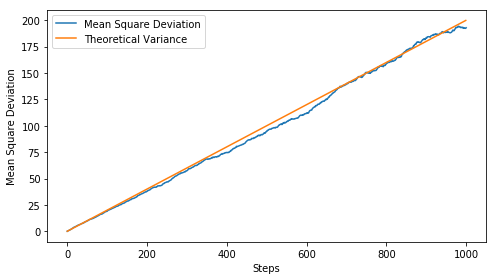

In [16]:
t = np.arange(0, 1000)
MSDtraj = np.array([])
for i in traj:
    MSDtraj = np.append(MSDtraj, np.mean(i**2))

plt.figure(figsize=(7,4))
plt.xlabel('Steps')
plt.ylabel('Mean Square Deviation')
plt.plot(range(len(MSDtraj)), MSDtraj, label='Mean Square Deviation')
plt.plot(t, 2*D*(t*delt), label='Theoretical Variance')
plt.legend()
plt.show()

# Simulating Linear Potential

C:\Users\dpcar\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


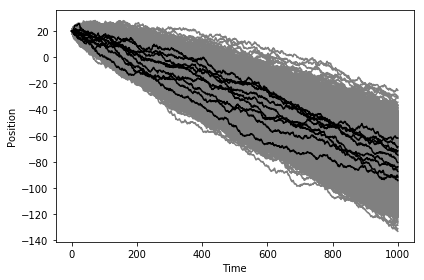

Time to Run Simulation 598.7883667


In [17]:
import time
tic = time.perf_counter()
D = 1
beta = 1
a = 1
delt = 0.1 
x0 = 20

def trajectory(x, initalx = x0): 
    tra = np.array([initalx])
    for i in range(len(x)):
        tra = np.append(tra, tra[i]+x[i])
    return tra

M = 10000

xrand = np.sqrt(2*D*delt)*np.random.randn(10**3) - D*beta*delt*a
traj = trajectory(xrand)
for i in range(M):
    xrand = np.sqrt(2*D*delt)*np.random.randn(10**3) - D*beta*delt*a
    traj2 = trajectory(xrand)

    traj = np.column_stack((traj, traj2))

plt.figure()

plt.plot(range(len(traj)),traj, '#808080')
plt.plot(range(len(traj)), traj[:, 0:9],'k')

plt.xlabel('Time')
plt.ylabel('Position')

plt.show()
toc = time.perf_counter()

print('Time to Run Simulation', toc - tic)

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import clear_output
rcParams.update({'figure.autolayout': True})
fig = plt.figure(figsize=(12,7))

ay = fig.add_subplot(111, autoscale_on=False, xlim = (-75,75), ylim = (0,0.7))




def init():
    """initialize animation"""
    return

frames = 400
def animate(i):
    """perform animation step"""
    global fig
    
    # update pieces of the animation
    t=i
    r = np.linspace(-75, 75, 1000)
    prob =  (4*np.pi * D* (t*delt+delt))**(-1/2)  *np.exp(-(r-x0+D*beta*(t*delt+delt))**2/(4*D*(t*delt+delt)))
    if i % 1 == 0:
        clear_output(wait=True)
        print((i/frames)*100, '%')
        ay.clear()
        # i +2 to not have a dirac delta at the begining
        hist = ay.hist(traj[i+2, :],bins='auto',density=True,label='Measured')
        theo, = ay.plot(r,prob, label = 'Theoretical Prediction', linewidth=3.0)
        
        ay.set_title('Probability Distribution of Position', fontsize=24)
        ay.set_xlabel('Position', fontsize=22)
        ay.set_ylabel('Probability', fontsize=22)
        ay.tick_params(labelsize=14)
        ay.legend(fontsize=18)
        ay.set_xlim(-75,75)
        ay.set_ylim(0,0.7)
        ay.text(0.0,0.65,"timestep = " + str(i),fontsize = 14)

    return

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=False)
anim.save('Linear Potential.mp4')
plt.show()


HTML(anim.to_html5_video())


99.75 %


# $\sigma^2$ = $2 Dt \Delta t $
### Comparing the mean squared deviation versus the predicted variance for non linear potential

C:\Users\dpcar\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


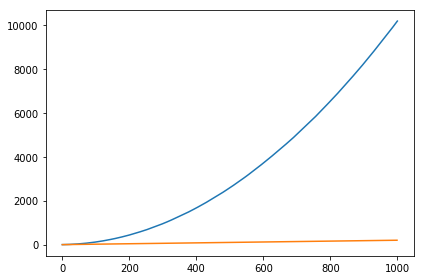

In [19]:
t = np.arange(0, 1000)
MSDtraj = np.array([])
for i in traj:
    MSDtraj = np.append(MSDtraj, np.mean(i**2)+ 20**2 -2*20*np.mean(i))

plt.figure()

plt.plot(range(len(MSDtraj)), MSDtraj)
plt.plot(t, 2*D*(t*delt))

plt.show()